# 🍕🍦 Pizza and Ice Cream Classification Project

## 📌 Project Workflow

### 1. 🧐 Understand the Dataset
- Identify that the dataset contains image data of two classes: **Pizza** and **Ice Cream**.
- Understand the input format (image dimensions, color channels).
- Prepare and label the image dataset accordingly.

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import time
import keras_tuner as kt
from sklearn.metrics import classification_report
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
import os
from scipy import ndimage

# Data Augmentation code


In [ ]:
# Define input and output directories
input_root = r"C:\Users\HP\Downloads\CNN\archive (3)\dataset\train"
output_root = r"C:\Users\HP\Downloads\CNN\archive (3)\dataset\augmented_dataset\train"

# List of class folders (pizza, ice_cream)
categories = ["pizza", "ice_cream"]

# Loop through each category
for category in categories:
    input_folder = os.path.join(input_root, category)
    output_folder = os.path.join(output_root, category)
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each image in the folder
    for idx, filename in enumerate(os.listdir(input_folder)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)

            if image is None:
                continue  # skip if image not loaded properly

            base_filename = f"{category}_{idx}"

            # Save original
            cv2.imwrite(os.path.join(output_folder, f"{base_filename}.jpg"), image)

            # Flip
            flipped = cv2.flip(image, 1)
            cv2.imwrite(os.path.join(output_folder, f"{base_filename}_flip.jpg"), flipped)

            # Grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(os.path.join(output_folder, f"{base_filename}_gray.jpg"), gray)

            # Rotation
            rotated = ndimage.rotate(image, 15)
            cv2.imwrite(os.path.join(output_folder, f"{base_filename}_rotated.jpg"), rotated)

            # Blur
            blur = cv2.GaussianBlur(image, (3, 3), 2)
            cv2.imwrite(os.path.join(output_folder, f"{base_filename}_blur.jpg"), blur)


# The augmented data was zipped in a folder and uploaded on colab

In [7]:
!unzip data.zip -d data

Archive:  data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


In [9]:
import zipfile

with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall("data")  # You can rename 'data' to any folder name


In [10]:
train_data = keras.utils.image_dataset_from_directory(
    "/content/data/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)


test_data = keras.utils.image_dataset_from_directory(
    "/content/data/test",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)


val_data = keras.utils.image_dataset_from_directory(
    "/content/data/valid",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 3590 files belonging to 2 classes.
Found 106 files belonging to 2 classes.
Found 208 files belonging to 2 classes.


### 2. 🎯 Problem Statement
> **"Build a neural network to accurately classify images as either Pizza or Ice Cream."**

In [13]:
# Create the model with ResNet50
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(256, 256, 3))

base_model.trainable = False  # Freeze base layers initially

# Build the classifier on top
model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer= "adam", loss='binary_crossentropy',metrics=['accuracy'])

start= time.time()

# Train the model
history = model.fit(train_data,validation_data=val_data,epochs=20,batch_size=64)

end=time.time()
print(end-start)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.8683 - loss: 0.2990 - val_accuracy: 0.9567 - val_loss: 0.0987
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.9830 - loss: 0.0452 - val_accuracy: 0.9663 - val_loss: 0.0814
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9971 - loss: 0.0155 - val_accuracy: 0.9663 - val_loss: 0.1015
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9994 - loss: 0.0062 - val_accuracy: 0.9663 - val_loss: 0.0866
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9712 - val_loss: 0.0834
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9760 - val_loss: 0.0763
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9712 - val_loss: 0.0860
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 1.0000 - loss: 9

###  Hyperparameter Tuning

In [18]:
def build_model(hp):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False

    model = keras.Sequential()
    model.add(base_model)
    model.add(keras.layers.GlobalAveragePooling2D())

    # Tune number of units in dense layer
    units = hp.Int('units', min_value=64, max_value=256, step=64)
    model.add(keras.layers.Dense(units, activation='relu'))

    # Tune dropout rate
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.3, step=0.1)
    if dropout_rate > 0:
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # Tune learning rate for Adam optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer= Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=['accuracy'] )

    return model


In [19]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='pizza_icecream_classification'
)

tuner.search(train_data, validation_data=val_data)

best_model = tuner.get_best_models(num_models=1)[0]


Trial 30 Complete [00h 03m 37s]
val_accuracy: 0.9759615659713745

Best val_accuracy So Far: 0.9807692170143127
Total elapsed time: 00h 48m 58s


###  Model Evaluation

In [20]:
# Final model evaluation on truly unseen test data
loss, accuracy = best_model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9810 - loss: 0.0761
Test Accuracy: 0.9811


In [22]:
best_model.save("best_model.keras")

In [24]:
model = tf.keras.models.load_model("/content/best_model.keras")


# Define class names
class_names = ["Ice Cream", "Pizza"]

# Preprocess image function for prediction
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Predict on images
def predict_image(img_path):
    img_processed = preprocess_image(img_path)
    prediction = model.predict(img_processed)
    label = class_names[int(np.round(prediction[0][0]))]
    return label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


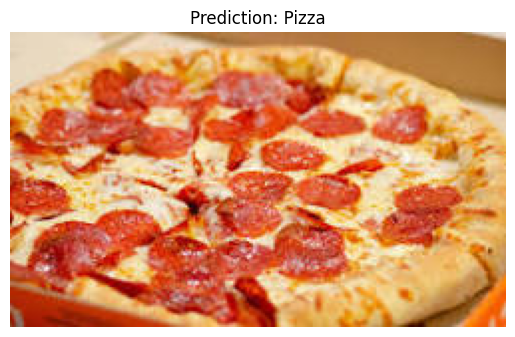

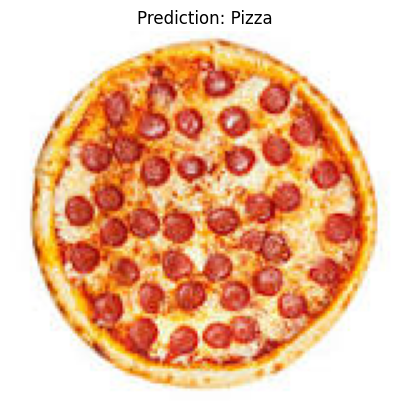

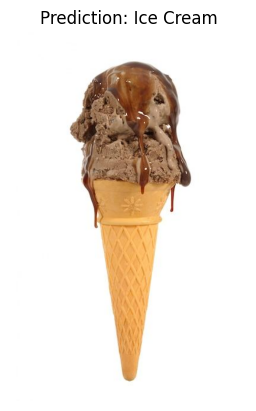

In [28]:
# Test the prediction
img1_path = '/content/download (1).jpeg'
img2_path = '/content/download.jpeg'
img3_path = '/content/00616_jpg.rf.312a32ee45c8652ae663c5de19b0bdc8.jpg'

label1 = predict_image(img1_path)
label2 = predict_image(img2_path)
label3 = predict_image(img3_path)

# Display results with original images
def load_and_show(img_path, label):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

load_and_show(img1_path, label1)
load_and_show(img2_path, label2)
load_and_show(img3_path, label3)